In [100]:
# %pip install altair vega_datasets
# %pip install plotly


In [71]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import re

pd.set_option('display.max_columns', None)

In [93]:
path = 'data' # use your path
all_files = glob.glob(path + "/season_stats_*.xlsx")

season_stats = []
for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    df['Year'] = int(re.findall("\d+", filename)[0])
    
    season_stats.append(df)

df_all = pd.concat(season_stats, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [111]:
pd.read_excel('data/season_stats_cleaned_ALL.xlsx')

df_all['Player name'] = df_all['Name_2'] + ' ' + df_all['Name_3'].str.split(',').str[0]
df_all['Jersey'] = df_all['Jersey'].astype(str)


# filter out unneccessary cols and reorder
cols = [
  'Player name', 'Year', 'Posn_1', 'Posn_2', 'Rd..', 'Team', 'Vs', 'Weather', 'Jersey', 'Price', 'Pts', 'Mins', 'BE',
  'Base', 'Score', 'Create', 'Evade', 'Neg', 
  'TR', 'TS', 'LT', 'GO', 'MG', 'FG', 'MF', 'TA', 'MT', 'TB', 'FD', 'OL', 'IO', 'LB', 'LA', 'FT', 'KB', 'H8', 'HU', 'HG', 'IT', 'KD', 'PC', 'ER', 'SS',
  'Avg Pts', 'Avg Mins', 'CV',  'PPM', 'Bye', 'Season $+/-', 'Rd $+/-',  '2Rd Avg', '3Rd Avg', '5Rd Avg', '3Rd Avg Mins', '5Rd Avg Mins', 
  'BPPM', 'BasePow PPM', 'Base+Pow', 'H8%', 'TB%', 'MT%', 'OL+ IL%', '%Base',  'Base Avg', 'Score Avg', 'Create Avg', 'Evade Avg', 'Neg Avg'
]

df_all = df_all[cols]
df_all.to_excel('data/season_stats_cleaned_ALL.xlsx', index=False)


KeyError: 'Name_2'

In [110]:
# df_all[(df_all['Year'].isin([2021])) & (df_all['Player name'].isin(['Nicholas Hynes']))]

# df_all[(df_all['Year'].isin([2021, 2020])) & (df_all['Player name'].isin(['Nicholas Hynes']))]

df_all['Jersey'] = df_all['Jersey'].astype('string')

df_all['Jersey']
df_all['Jersey']

TypeError: data type 'string' not understood

In [79]:
ss_2021.columns



Index(['Player name', 'Posn_1', 'Posn_2', 'Team', 'Price', 'Pts', 'Mins',
       'Avg Pts', 'BE', 'CV', 'Avg Mins', 'PPM', 'Bye', 'Season $+/-', 'Rd..',
       'Rd $+/-', 'Vs', 'Weather', 'Jersey', '2Rd Avg', '3Rd Avg', '5Rd Avg',
       '3Rd Avg Mins', '5Rd Avg Mins', 'BPPM', 'BasePow PPM', 'Base+Pow',
       'H8%', 'TB%', 'MT%', 'OL+ IL%', '%Base', 'Base', 'Score', 'Create',
       'Evade', 'Neg', 'TR', 'TS', 'LT', 'GO', 'MG', 'FG', 'MF', 'TA', 'MT',
       'TB', 'FD', 'OL', 'IO', 'LB', 'LA', 'FT', 'KB', 'H8', 'HU', 'HG', 'IT',
       'KD', 'PC', 'ER', 'SS', 'Base Avg', 'Score Avg', 'Create Avg',
       'Evade Avg', 'Neg Avg'],
      dtype='object')

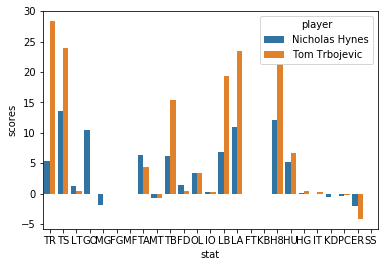

In [56]:
ss_2021[ss_2021['Player name'].isin(['Nicholas Hynes', 'Tom Trbojevic'])]


averages = []

for player in ['Nicholas Hynes', 'Tom Trbojevic']:  
  averages.append(pd.DataFrame({
    'player': [player] * len(sc_stats),
    'stat': sc_stats,
    'scores': list(ss_2021[ss_2021['Player name'] == player][sc_stats].mean())
  }))



averages_df = pd.concat(averages)
averages_df



ax = sns.barplot(x='stat', hue='player', y='scores', data=averages_df)


In [60]:
ss_2021

,Posn_1,Posn_2,Team,Price,Pts,Mins,Avg Pts,BE,CV,Avg Mins,PPM,Bye,Season $+/-,Rd..,Rd $+/-,Vs,Weather,Jersey,2Rd Avg,3Rd Avg,5Rd Avg,3Rd Avg Mins,5Rd Avg Mins,BPPM,BasePow PPM,Base+Pow,H8%,TB%,MT%,OL+ IL%,%Base,Base,Score,Create,Evade,Neg,TR,TS,LT,GO,MG,FG,MF,TA,MT,TB,FD,OL,IO,LB,LA,FT,KB,H8,HU,HG,IT,KD,PC,ER,SS,Base Avg,Score Avg,Create Avg,Evade Avg,Neg Avg
0,FLB,NaN,SYD,"$186,800",12,78,12,36,0.00,78,0.15,13,$0,24,$0,STH,Fine,5,0,0,0,0,0,0.18,0.18,14,33.3,0.0,66.7,0.0,100,14,0,0,0,-2,0,0,0,0,0,0,0,2,-4,0,0,0,0,0,0,0,0,8,8,0,0,0,0,-2,0,14,0,0,0,-2
1,CTW,NaN,MEL,"$475,900",33,80,33,88,0.00,80,0.41,17,$0,1,$0,STH,Fine,5,0,0,0,0,0,0.19,0.24,19,62.5,25.0,33.3,0.0,45,15,0,4,14,0,0,0,4,0,0,0,0,4,-2,4,0,0,0,10,0,0,0,10,3,0,0,0,0,0,0,15,0,4,14,0
2,CTW,NaN,MEL,"$475,900",41,80,37,108,0.11,80,0.51,17,$0,2,$0,PAR,Good,5,37,0,0,0,0,0.34,0.36,29,66.7,8.3,11.1,0.0,60,27,0,6,12,-4,0,0,0,0,0,0,0,8,-1,2,6,0,0,10,0,0,0,16,4,0,0,0,-2,-2,0,27,0,6,12,-4
3,CTW,NaN,MEL,"$437,400",40,80,38,86,0.09,80,0.50,17,"$-38,500",3,"$-38,500",PTH,Good,5,41,38,0,80,0,0.19,0.24,19,50.0,20.0,50.0,0.0,33,15,17,0,14,-6,17,0,0,0,0,0,0,2,-2,4,0,0,0,10,0,0,0,10,5,0,0,0,0,-6,0,15,17,0,14,-6
4,CTW,NaN,MEL,"$428,900",64,80,45,60,0.26,80,0.80,17,"$-47,000",4,"$-8,500",BRO,Good,5,52,48,0,80,0,0.40,0.53,42,80.0,33.3,0.0,0.0,47,32,4,12,20,-4,0,12,0,4,0,0,0,5,0,10,0,0,0,10,0,0,0,24,3,0,0,0,0,-4,0,32,4,12,20,-4
5,CTW,NaN,MEL,"$427,900",52,80,58,48,0.10,80,0.65,17,"$-48,000",5,"$-1,000",BUL,Good,5,58,0,0,0,0,0.29,0.44,35,81.8,54.5,0.0,0.0,44,23,17,0,12,0,17,0,0,0,0,0,0,3,0,12,0,0,0,0,0,0,0,18,2,0,0,0,0,0,0,23,17,0,12,0
6,CTW,NaN,MEL,"$416,800",23,80,42,84,0.31,80,0.29,17,"$-59,100",6,"$-11,100",SYD,Good,5,38,46,44,80,80,0.24,0.31,25,70.0,30.0,33.3,0.0,76,19,0,0,6,-2,0,0,0,0,0,0,0,4,-2,6,0,0,0,0,0,0,0,14,3,0,0,0,0,-2,0,19,0,0,6,-2
7,CTW,NaN,MEL,"$439,000",107,80,51,38,0.50,80,1.34,17,"$-36,900",7,"$22,200",NZL,Good,5,65,61,57,80,80,0.25,0.53,42,54.5,100.0,20.0,0.0,18,20,34,-3,62,-6,34,0,0,0,0,0,0,4,-1,22,0,0,0,40,0,0,0,12,5,0,0,-3,0,-6,0,20,34,-3,62,-6
8,CTW,NaN,MEL,"$456,300",53,80,52,14,0.46,80,0.66,17,"$-19,600",8,"$17,300",SHA,Good,5,80,61,60,80,80,0.20,0.33,26,88.9,55.6,100.0,0.0,30,16,17,0,20,0,17,0,0,0,0,0,0,0,-1,10,0,0,0,10,0,0,0,16,1,0,0,0,0,0,0,16,17,0,20,0
9,CTW,NaN,MEL,"$582,300",178,80,66,-8,0.69,80,2.23,17,"$106,400",9,"$126,000",STH,Good,5,116,113,83,80,80,0.35,0.45,36,92.3,30.8,0.0,0.0,16,28,102,0,48,0,102,0,0,0,0,0,0,3,0,8,0,0,0,40,0,0,0,24,1,0,0,0,0,0,0,28,102,0,48,0
